In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

def get_data(filename):
    df = pd.read_csv(filename, names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.set_index('Datetime')
    df = df.drop(['Date', 'Time'], axis=1)
    return df

eurusd = get_data('EURUSD_D1.csv')
gbpusd = get_data('GBPUSD_D1.csv')
audusd = get_data('AUDUSD_D1.csv')
usdjpy = get_data('USDJPY_D1.csv')

returns = pd.DataFrame()
returns['EURUSD'] = eurusd.Close.pct_change()
returns['GBPUSD'] = gbpusd.Close.pct_change()
returns['AUDUSD'] = audusd.Close.pct_change()
returns['USDJPY'] = usdjpy.Close.pct_change()

returns = returns.dropna()

In [194]:
def plot_mean(df, title=''):
    df = df.resample('W').last()
    df['MA35'] = df.Close.rolling(35).mean()
    df['MA200'] = df.Close.rolling(200).mean()
    plt.figure(figsize=(12,6))
    df.Close.plot()
    df.MA35.plot()
    df.MA200.plot()
    plt.axhline(y=np.mean(df.Close.iloc[-52:]), color='red', linestyle='--')
    #plt.axhline(y=np.var(df.Close.iloc[-52:]))
    plt.title(title + 'Weekly : 1 Years Mean')
    plt.legend()
    plt.show()

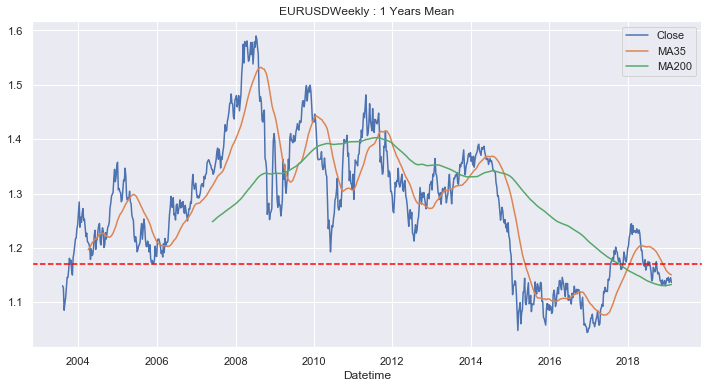

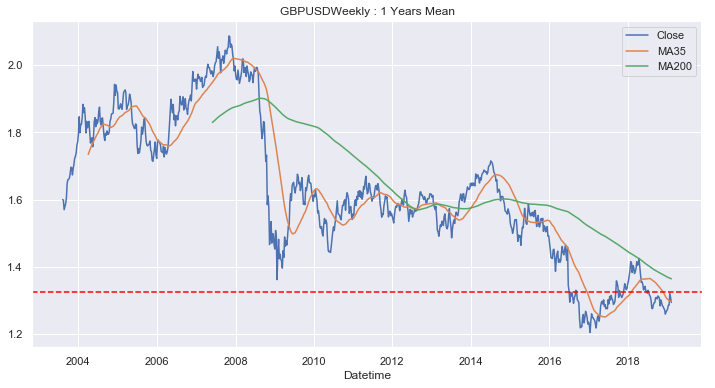

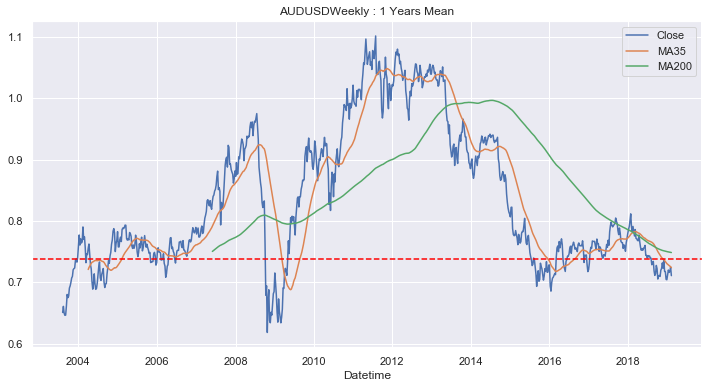

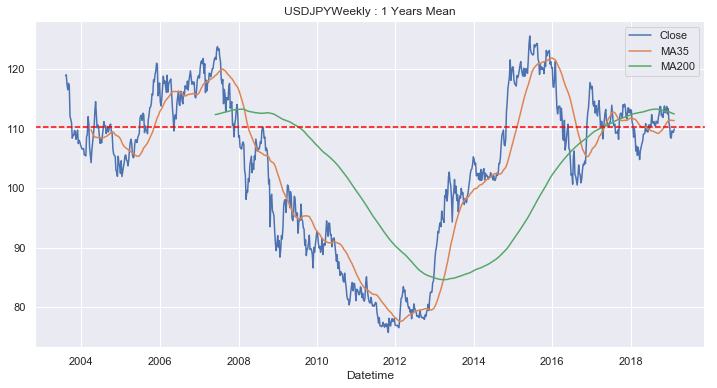

In [195]:
plot_mean(eurusd, 'EURUSD')
plot_mean(gbpusd, 'GBPUSD')
plot_mean(audusd, 'AUDUSD')
plot_mean(usdjpy, 'USDJPY')

0.02961599294254909


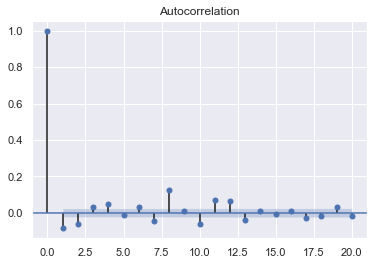

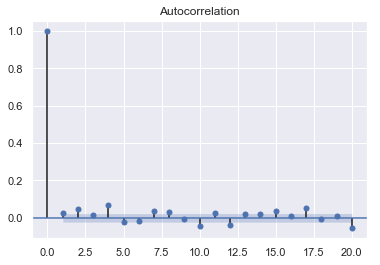

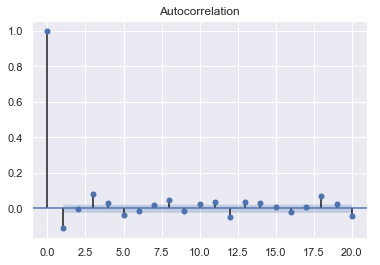

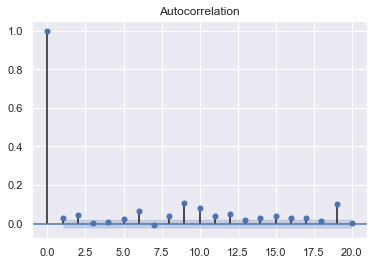

In [196]:
# ไม่แทงออกมา คือ White noise คือ Random Walk 
plot_acf(returns.AUDUSD.resample('W').last(), alpha=0.5, lags=20)
print(returns.USDJPY.resample('W').last().autocorr())
plot_acf(returns.EURUSD.resample('W').last(), alpha=0.5, lags=20)
plot_acf(returns.GBPUSD.resample('W').last(), alpha=0.5, lags=20)
plot_acf(returns.USDJPY.resample('W').last(), alpha=0.5, lags=20)
plt.show()

In [153]:
mod

/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda2/envs/python3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

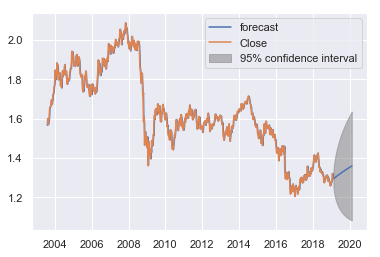

<Figure size 864x432 with 0 Axes>

In [198]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
df_week = gbpusd.Close.resample('W').last()
mod = ARMA(df_week, order=(1,0))
res = mod.fit()
res.plot_predict(start=0, end=len(df_week)+52)
plt.figure(figsize=(12,6))
plt.show()

In [199]:
result = adfuller(eurusd.Close)
print('Price P-value: {}'.format(result[1]))
result_ret = adfuller(returns.AUDUSD)
print('Return P-value: {}'.format(result_ret[1]))

Price P-value: 0.23715565004147082
Return P-value: 5.857029078518636e-30


In [200]:
returns.corr()

,EURUSD,GBPUSD,AUDUSD,USDJPY
EURUSD,1.000000,0.638677,0.585121,-0.237982
GBPUSD,0.638677,1.000000,0.541853,-0.102869
AUDUSD,0.585121,0.541853,1.000000,0.002017
USDJPY,-0.237982,-0.102869,0.002017,1.000000


Correlation: 0.6386767931056531


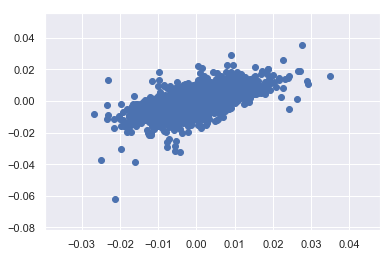

In [201]:
correlation = returns.EURUSD.corr(returns.GBPUSD)
print('Correlation: {}'.format(correlation))

plt.scatter(returns['EURUSD'], returns['GBPUSD'])

plt.show()

In [182]:
eu = get_data('EURUSD_M1.csv')

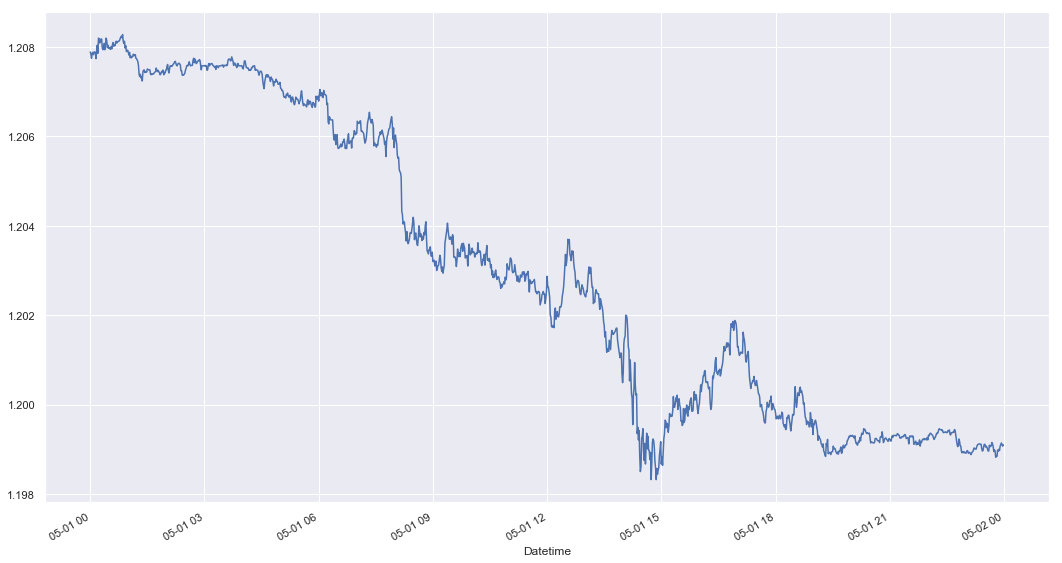

In [210]:
plt.figure(figsize=(18,10))
eu_focus = eu.loc['2018-05-01':'2018-05-01'].Close
eu_focus.plot(grid=True)
plt.show()

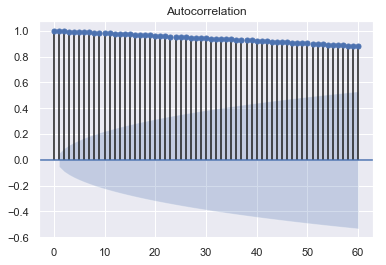

/anaconda2/envs/python3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


const          1.202983
ma.L1.Close    0.964435
dtype: float64


In [203]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = eu_focus.pct_change()
returns = eu_focus.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

In [221]:
x = gbpusd.Close
y = eurusd.Close

In [222]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress eurusd on gbpusd
x = sm.add_constant(x)
result = sm.OLS(y,x).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(y - b*x)
print("The p-value for the ADF test is ", adf_stats[1])

ValueError: The indices for endog and exog are not aligned